In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\D\Marc\SMS\FORMATIONS\analyse_duree':
  os.chdir(r'D:\D\Marc\SMS\FORMATIONS\analyse_duree')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


D:\Temp\ipykernel_33200\715238838.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\importlib\\_bootstrap_external.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\zipimport.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\codecs.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\aliases.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\__init__.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\encodings\\utf_8.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\abc.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\io.py": 1712667018.0, "C:\\Users\\thevenin_m\\AppDa

In [2]:
# Penser à installer les packages: pip install nom_package

import numpy  as np
import pandas as pd
import patsy  as pt
import lifelines as lf
import matplotlib.pyplot as plt
import statsmodels as sm

In [3]:
trans = pd.read_csv("https://raw.githubusercontent.com/mthevenin/analyse_duree/master/bases/transplantation.csv")

trans.head(10)
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          103 non-null    int64
 1   year        103 non-null    int64
 2   age         103 non-null    int64
 3   died        103 non-null    int64
 4   stime       103 non-null    int64
 5   surgery     103 non-null    int64
 6   transplant  103 non-null    int64
 7   wait        103 non-null    int64
 8   mois        103 non-null    int64
 9   compet      103 non-null    int64
dtypes: int64(10)
memory usage: 8.2 KB


In [4]:
T = trans['stime']
E = trans['died']


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T,E)
print(kmf.survival_function_)
a = "DUREE MEDIANE:"
b = kmf.median_survival_time_
print(a,b)

          KM_estimate
timeline             
0.0          1.000000
1.0          0.990291
2.0          0.961165
3.0          0.932039
5.0          0.912621
...               ...
1400.0       0.151912
1407.0       0.151912
1571.0       0.151912
1586.0       0.151912
1799.0       0.151912

[89 rows x 1 columns]
DUREE MEDIANE: 100.0


<Axes: xlabel='timeline'>

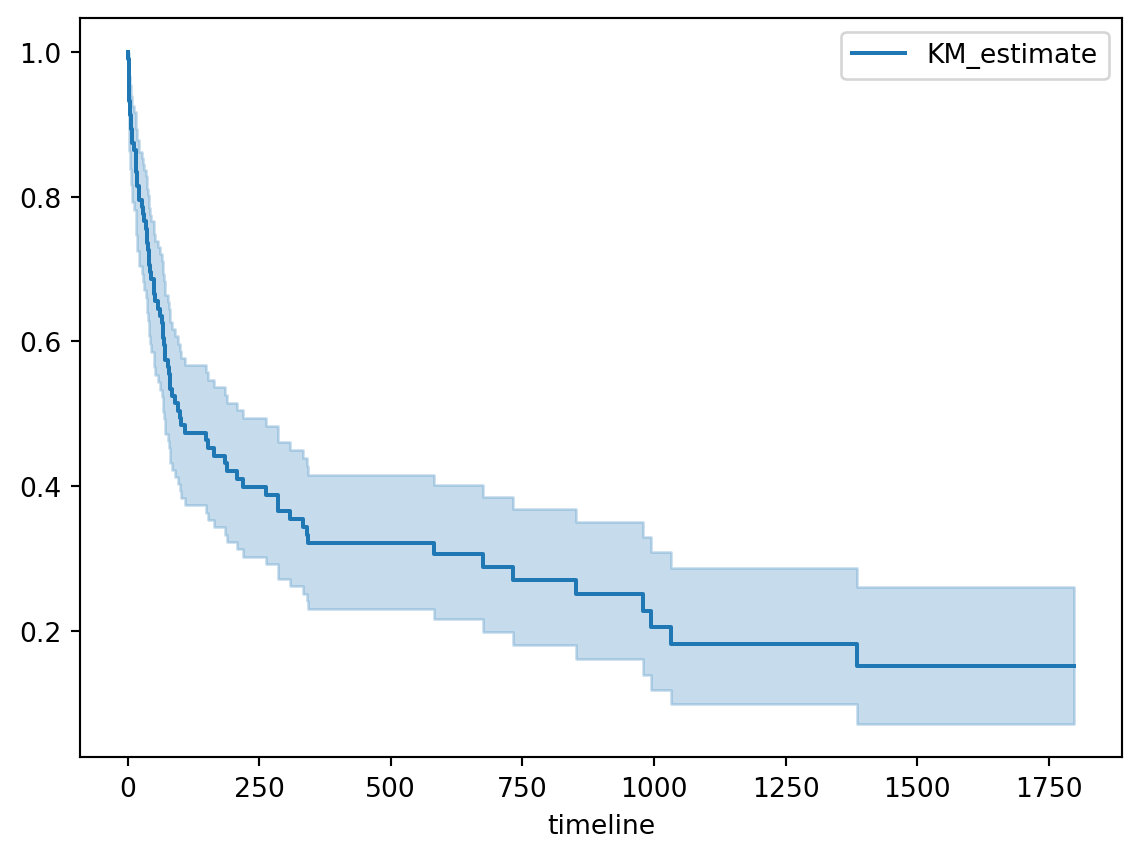

In [5]:
kmf.plot()

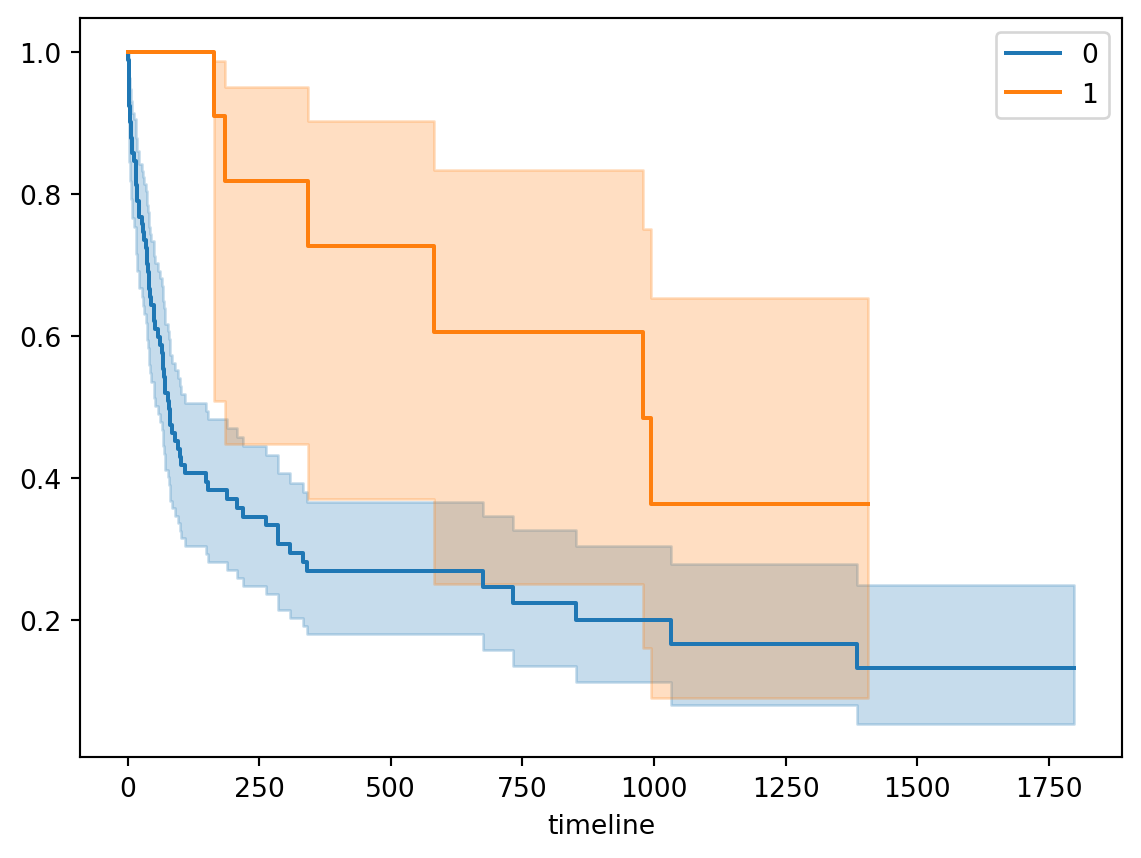

In [6]:
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
for name, grouped_df in trans.groupby('surgery'):
    kmf.fit(grouped_df['stime'], grouped_df['died'], label=name)
    kmf.plot(ax=ax)

In [7]:
from lifelines.statistics import multivariate_logrank_test
results = multivariate_logrank_test(trans['stime'], trans['surgery'], trans['died'])
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.59 0.01      6.61

In [8]:
from lifelines.utils import restricted_mean_survival_time

In [9]:
ix = trans['surgery'] == 1

In [10]:
tmax = 1407

In [11]:
kmf_1 = KaplanMeierFitter().fit(T[ix], E[ix], label='Opérés')
rmst_1 = restricted_mean_survival_time(kmf_1, t=tmax)

kmf_0 = KaplanMeierFitter().fit(T[~ix], E[~ix], label='Non opérés')
rmst_0 = restricted_mean_survival_time(kmf_0, t=tmax)

In [12]:
rmst_0

379.14763007035475

In [13]:
rmst_1

884.5757575757575

<Axes: xlabel='timeline'>

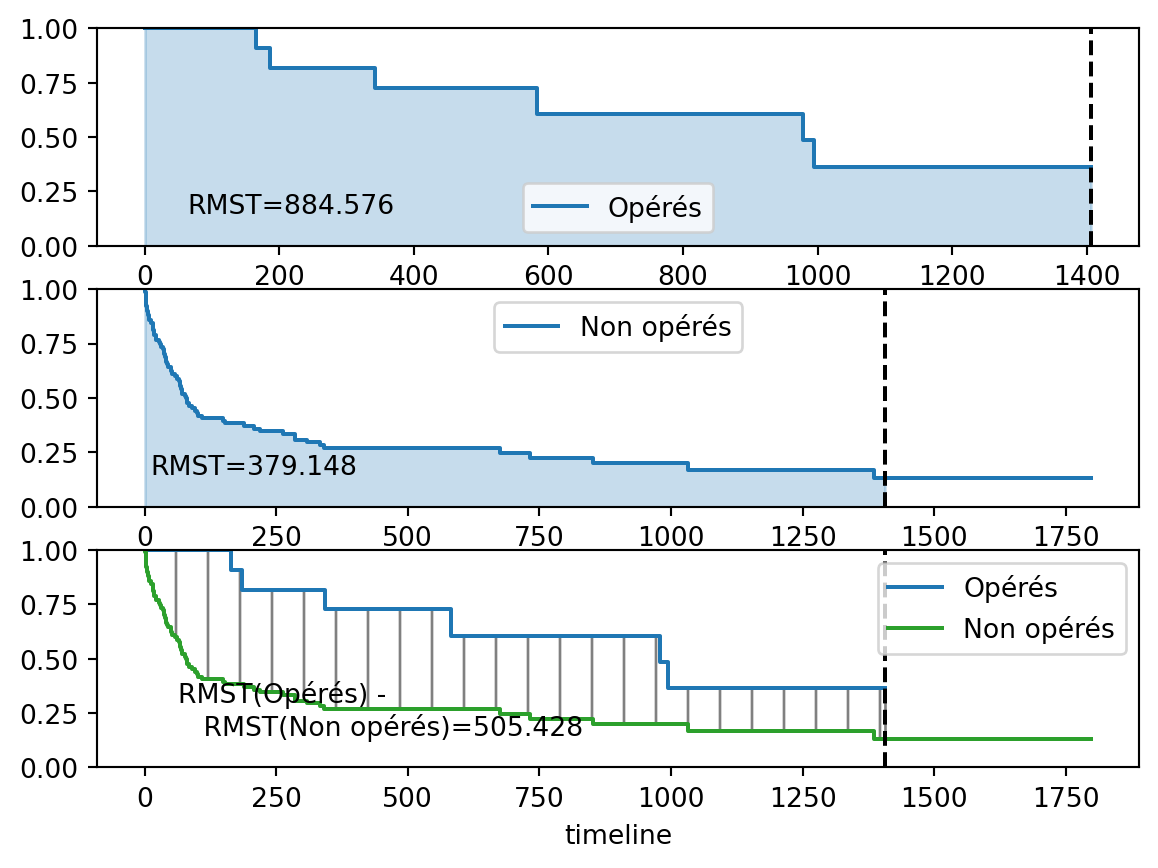

In [14]:
from matplotlib import pyplot as plt
from lifelines.plotting import rmst_plot

ax = plt.subplot(311)
rmst_plot(kmf_1, t=tmax, ax=ax)

ax = plt.subplot(312)
rmst_plot(kmf_0, t=tmax, ax=ax)

ax = plt.subplot(313)
rmst_plot(kmf_1, model2=kmf_0, t=tmax, ax=ax)

<lifelines.CoxPHFitter: fitted with 103 total observations, 28 right-censored observations>
             duration col = 'stime'
                event col = 'died'
      baseline estimation = breslow
   number of observations = 103
number of events observed = 75
   partial log-likelihood = -289.31
         time fit was run = 2024-09-24 07:12:17 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
C(surgery)[1] -0.99      0.37      0.44           -1.84           -0.13                0.16                0.88
year          -0.12      0.89      0.07           -0.25            0.01                0.78                1.01
age            0.03      1.03      0.01            0.00            0.06                1.00                1.06

               cmp to     z    p  -log2(p)
covariate                                 
C(surgery)[1]    0.00 -2.26 0.02      5.40
year             0.00 -1.78 0.08      3.72
age              0.00  2.19 0.03      5.12
---
Concordance = 0.65
Partial AIC = 584.61
log-likelihood ratio test = 17.63 on 3 df
-log2(p) of ll-ratio test = 10.90

<Axes: xlabel='log(HR) (95% CI)'>

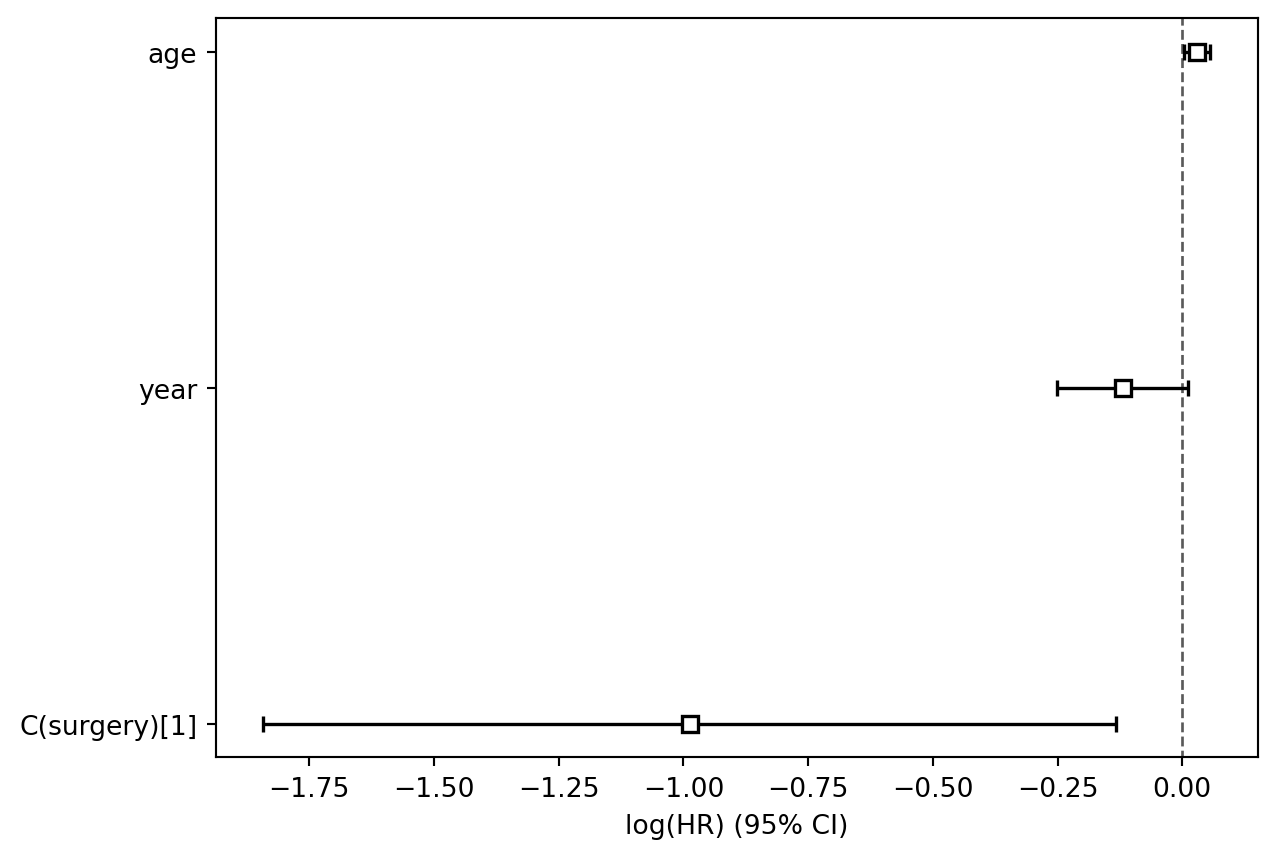

In [15]:
model = 'year + age + C(surgery) -1'
X = pt.dmatrix(model, trans, return_type='dataframe')
design_info = X.design_info
YX = X.join(trans[['stime','died']])
YX.drop(['C(surgery)[0]'], axis=1, inplace=True)
YX.head()


from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(YX, duration_col='stime', event_col='died')
cph.print_summary()
cph.plot()

In [16]:
from lifelines.utils import to_episodic_format
from lifelines import CoxTimeVaryingFitter

In [17]:
long = to_episodic_format(YX, duration_col='stime', event_col='died')

In [18]:
long['surgery_t'] = long['C(surgery)[1]'] * long['stop']

In [19]:
ctv = CoxTimeVaryingFitter()
ctv.fit(long,
        id_col='id',
        event_col='died',
        start_col='start',
        stop_col='stop',)
ctv.print_summary(4)

<lifelines.CoxTimeVaryingFitter: fitted with 31938 periods, 103 subjects, 75 events>
         event col = 'died'
number of subjects = 103
 number of periods = 31938
  number of events = 75
partial log-likelihood = -287.3290
  time fit was run = 2024-09-24 07:12:17 UTC

---
                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                        
C(surgery)[1] -1.7547    0.1730    0.6744         -3.0765         -0.4330              0.0461              0.6486
age            0.0289    1.0293    0.0134          0.0025          0.0552              1.0025              1.0568
year          -0.1231    0.8842    0.0668         -0.2541          0.0079              0.7756              1.0080
surgery_t      0.0022    1.0022    0.0011          0.0001          0.0044              1.0001              1.0044

               cmp to       z      p  -log2(p)
covariate                                     
C(surgery)[1]  0.0000 -2.6020 0.0093    6.7533
age            0.0000  2.1479 0.0317    4.9785
year           0.0000 -1.8415 0.0656    3.9312
surgery_t      0.0000  2.0239 0.0430    4.5400
---
Partial AIC = 582.6581
log-likelihood ratio test = 21.5846 on 4 df
-log2(p) of ll-ratio test = 12.0103

In [20]:
import statsmodels.formula.api as smf #type R formule => ce qu'on utilisera#
import statsmodels.api as sm #type python#

In [21]:
td = pd.read_csv("https://raw.githubusercontent.com/mthevenin/analyse_duree/master/bases/transplantation.csv")
td.drop(['id'], axis=1, inplace=True)
td['dur'] = td['mois']
td = to_episodic_format(td, duration_col='mois', event_col='died')

In [22]:
td['t2'] = td['stop']**2
td['t3'] = td['stop']**3
fit1 = smf.glm(formula=  "died ~ stop", data=td, family=sm.families.Binomial()).fit()
fit2 = smf.glm(formula=  "died ~ stop + t2", data=td, family=sm.families.Binomial()).fit()
fit3 = smf.glm(formula=  "died ~ stop + t2 + t3", data=td, family=sm.families.Binomial()).fit()

In [23]:
print("AIC pour ajustement t1")
print(fit1.aic)
print("AIC pour ajustement durée t1 + t2")
print(fit2.aic)
print("AIC pour ajustement durée t1 + t2 + t3")
print(fit3.aic)

AIC pour ajustement t1
504.5211512753311
AIC pour ajustement durée t1 + t2
492.11522432726747
AIC pour ajustement durée t1 + t2 + t3
486.50534103180416


In [24]:
tdfit = smf.glm(formula=  "died ~ stop + t2 + t3 + year + age + surgery", data=td, family=sm.families.Binomial()).fit()
tdfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   died   No. Observations:                 1127
Model:                            GLM   Df Residuals:                     1120
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -230.34
Date:                Tue, 24 Sep 2024   Deviance:                       460.67
Time:                        09:12:18   Pearson chi2:                 1.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.07732
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0827      5.308      1.334      0.182      -3.320      17.486
stop          -0.3721      0.082     -4.516      0.000      -0.534      -0.211
t2             0.0142      0.005      2.835      0.005       0.004       0.024
t3            -0.0002   7.85e-05     -2.113      0.035      -0.000    -1.2e-05
year          -0.1327      0.074     -1.798      0.072      -0.277       0.012
age            0.0333      0.015      2.270      0.023       0.005       0.062
surgery       -1.0109      0.449     -2.254      0.024      -1.890      -0.132
==============================================================================
"""

In [25]:
td['ct4'] = pd.qcut(td['stop'],[0, .25, .5, .75, 1.]) 
td['ct4'].value_counts(normalize=True)*100
td.ct4 = pd.Categorical(td.ct4)
td['ct4'] = td.ct4.cat.codes

In [26]:
td2 = td 
td2['t'] = td2['ct4']
td2 = td2.sort_values(['id', 'stop'])
td2 =  td2.groupby(['id','ct4']).last()

In [27]:
td2fit = smf.glm(formula=  "died ~ C(t) +  year + age + surgery", data=td2, family=sm.families.Binomial()).fit()
td2fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   died   No. Observations:                  197
Model:                            GLM   Df Residuals:                      190
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.24
Date:                Tue, 24 Sep 2024   Deviance:                       222.48
Time:                        09:12:18   Pearson chi2:                     221.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1808
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4467      6.654      1.871      0.061      -0.594      25.488
C(t)[T.1]     -1.0334      0.419     -2.467      0.014      -1.854      -0.212
C(t)[T.2]     -1.6152      0.545     -2.965      0.003      -2.683      -0.547
C(t)[T.3]     -0.4789      0.599     -0.799      0.424      -1.654       0.696
year          -0.2032      0.093     -2.181      0.029      -0.386      -0.021
age            0.0469      0.018      2.533      0.011       0.011       0.083
surgery       -1.1102      0.503     -2.209      0.027      -2.095      -0.125
==============================================================================
"""

In [28]:
from lifelines import WeibullAFTFitter, LogLogisticAFTFitter

In [29]:
aftw = WeibullAFTFitter()
aftw.fit(YX, duration_col='stime', event_col='died')
aftw.print_summary()

<lifelines.WeibullAFTFitter: fitted with 103 total observations, 28 right-censored observations>
             duration col = 'stime'
                event col = 'died'
   number of observations = 103
number of events observed = 75
           log-likelihood = -488.17
         time fit was run = 2024-09-24 07:12:18 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                      
lambda_ C(surgery)[1]  1.97      7.17      0.78            0.44            3.50                1.56               33.05
        age           -0.06      0.94      0.02           -0.11           -0.01                0.90                0.99
        year           0.16      1.18      0.12           -0.08            0.40                0.93                1.49
        Intercept     -3.02      0.05      8.73          -20.13           14.09                0.00            1.31e+06
rho_    Intercept     -0.59      0.56      0.09           -0.77           -0.41                0.46                0.67

                       cmp to     z      p  -log2(p)
param   covariate                                   
lambda_ C(surgery)[1]    0.00  2.53   0.01      6.45
        age              0.00 -2.49   0.01      6.28
        year             0.00  1.33   0.18      2.44
        Intercept        0.00 -0.35   0.73      0.46
rho_    Intercept        0.00 -6.33 <0.005     31.93
---
Concordance = 0.65
AIC = 986.34
log-likelihood ratio test = 18.87 on 3 df
-log2(p) of ll-ratio test = 11.75

In [30]:
aftl = LogLogisticAFTFitter()
aftl.fit(YX, duration_col='stime', event_col='died')
aftl.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 103 total observations, 28 right-censored observations>
             duration col = 'stime'
                event col = 'died'
   number of observations = 103
number of events observed = 75
           log-likelihood = -482.58
         time fit was run = 2024-09-24 07:12:19 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                       
alpha_ C(surgery)[1]   2.27      9.70      0.69            0.92            3.63                2.50               37.56
       age            -0.04      0.96      0.02           -0.08           -0.00                0.92                1.00
       year            0.24      1.27      0.12            0.01            0.47                1.01                1.60
       Intercept     -10.43      0.00      8.34          -26.77            5.92                0.00              372.19
beta_  Intercept      -0.18      0.84      0.10           -0.37            0.01                0.69                1.01

                      cmp to     z      p  -log2(p)
param  covariate                                   
alpha_ C(surgery)[1]    0.00  3.29 <0.005      9.95
       age              0.00 -2.01   0.04      4.48
       year             0.00  2.06   0.04      4.66
       Intercept        0.00 -1.25   0.21      2.24
beta_  Intercept        0.00 -1.86   0.06      3.99
---
Concordance = 0.66
AIC = 975.16
log-likelihood ratio test = 21.69 on 3 df
-log2(p) of ll-ratio test = 13.69

In [31]:
km = sm.SurvfuncRight(trans["stime"], trans["died"])
km.summary()

,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
1,0.990291,0.009661,103,1.0
2,0.961165,0.019037,102,3.0
3,0.932039,0.024799,99,3.0
5,0.912621,0.027825,96,2.0
6,0.893204,0.030432,94,2.0
...,...,...,...,...
852,0.250655,0.048731,14,1.0
979,0.227868,0.049341,11,1.0
995,0.205081,0.049390,10,1.0


In [32]:
sm.duration.survdiff(trans.stime, trans.died, trans.surgery)

(6.5900123232343875, 0.010255246157888975)

In [33]:
sm.duration.survdiff(trans.stime, trans.died, trans.surgery, weight_type='gb')

(8.989753779902493, 0.0027149757927903417)

In [34]:
sm.duration.survdiff(trans.stime, trans.died, trans.surgery, weight_type='tw')

(8.462352726451392, 0.0036257256194570653)

In [35]:
mod = smf.phreg("stime ~  year + age + surgery ",trans, status='died', ties="efron")
rslt = mod.fit()
print(rslt.summary())

                       Results: PHReg
Model:                    PH Reg       Sample size:       103
Dependent variable:       stime        Num. events:       75 
Ties:                     Efron                              
-------------------------------------------------------------
         log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
-------------------------------------------------------------
year    -0.1196    0.0673 0.8872 -1.7765 0.0757 0.7775 1.0124
age      0.0296    0.0135 1.0300  2.1872 0.0287 1.0031 1.0577
surgery -0.9873    0.4363 0.3726 -2.2632 0.0236 0.1584 0.8761
Confidence intervals are for the hazard ratios
